# ***``Principal Component Analysis (PCA)``***

---

## 1. [Understanding PCA using dummy dataset](#Understanding_PCA)
- #### [Data Normalization](#STEP-1)
- #### [COV Symmetric Matrix](#STEP-2)

## 2. [Ways of calculating Eigen Values & Vectors](#Calculating_Eigen_values_and_vectors)
- #### [Using Numpy Linear Alzebra](#1._Numpy_Linear_Alzebra)
- #### [Using Scipy Linear Alzebra](#2._Scipy_Linear_Alzebra)
- #### [Using Sklearn PCA](#3._Sklearn_PCA)
- #### [Using Scipy SVD](#4._Scipy_SVD)
    
## 3. [PCA on Iris Dataset](#PCA_on_IRIS_Dataset)

## 4. [Ways of generating Symmetric_Matrix](#Ways_of_generating_Symmetric_Matrix)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler as SS
from numpy.linalg import eigh
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score as acc_scr, precision_score as pre_scr, recall_score as rec_scr

## ***`Understanding_PCA`***
#### **Using dummy dataset**

In [2]:
toy_df = pd.DataFrame({'col1':[9,0,4,5,6,7],
                       'col2':[6,8,9,3,2,5],
                       'col3':[2,3,8,3,7,0],
                       'col4':[1,7,8,4,5,8]})
toy_df

,col1,col2,col3,col4
0,9,6,2,1
1,0,8,3,7
2,4,9,8,8
3,5,3,3,4
4,6,2,7,5
5,7,5,0,8


### ***STEP-1***
- #### **`Normalizing the dataset`**

In [3]:
ss = SS()

In [4]:
toy_df_nrm = pd.DataFrame(ss.fit_transform(toy_df),columns=toy_df.columns)
toy_df_nrm

,col1,col2,col3,col4
0,1.372065,0.2,-0.656205,-1.8
1,-1.849305,1.0,-0.298275,0.6
2,-0.417585,1.4,1.491375,1.0
3,-0.059655,-1.0,-0.298275,-0.6
4,0.298275,-1.4,1.133445,-0.2
5,0.656205,-0.2,-1.372065,1.0


In [5]:
## How Standard Scaler works?
#### Below I have mentioned the manual way of standard scaler for 'col2' of the dummy set
(toy_df['col2'] - toy_df['col2'].mean())/np.std(toy_df['col2'])

0    0.2
1    1.0
2    1.4
3   -1.0
4   -1.4
5   -0.2
Name: col2, dtype: float64

### ***STEP-2***
- #### **`Finding the Co-variance matrix of Normalized dataset`**
    - ##### **Un-biased Symmetric matrix**

In [6]:
toy_df_nrm_cov = pd.DataFrame(np.cov(toy_df_nrm,rowvar=False,bias=False))
toy_df_nrm_cov

,0,1,2,3
0,1.200000,-0.529736,-0.303203,-0.672908
1,-0.529736,1.200000,0.128855,0.464000
2,-0.303203,0.128855,1.200000,0.214758
3,-0.672908,0.464000,0.214758,1.200000


In [7]:
unbias_ddof = 1
toy_df_nrm_rows = toy_df_nrm.shape[0]

toy_df_nrm_cov2 = (1/(toy_df_nrm_rows - unbias_ddof)) * (toy_df_nrm.T @ toy_df_nrm)
toy_df_nrm_cov2

,col1,col2,col3,col4
col1,1.200000,-0.529736,-0.303203,-0.672908
col2,-0.529736,1.200000,0.128855,0.464000
col3,-0.303203,0.128855,1.200000,0.214758
col4,-0.672908,0.464000,0.214758,1.200000


#### **Just for understanding purpose calculating the biased COV Symmetric Matrix**
- #### **Biased Symmetric matrix**

In [8]:
toy_df_nrm_bias_cov = pd.DataFrame(np.cov(toy_df_nrm,rowvar=False,bias=True))
toy_df_nrm_bias_cov

,0,1,2,3
0,1.000000,-0.441447,-0.252669,-0.560757
1,-0.441447,1.000000,0.107379,0.386667
2,-0.252669,0.107379,1.000000,0.178965
3,-0.560757,0.386667,0.178965,1.000000


In [9]:
bias_ddof = 0
toy_df_nrm_rows = toy_df_nrm.shape[0]

toy_df_nrm_bias_cov = (1/(toy_df_nrm_rows - bias_ddof)) * (toy_df_nrm.T @ toy_df_nrm)
toy_df_nrm_bias_cov

,col1,col2,col3,col4
col1,1.000000,-0.441447,-0.252669,-0.560757
col2,-0.441447,1.000000,0.107379,0.386667
col3,-0.252669,0.107379,1.000000,0.178965
col4,-0.560757,0.386667,0.178965,1.000000


## **`Calculating_Eigen_values_and_vectors`**

### **There are different ways of Calculating EIGEN values and vectors:**

### **1._Numpy_Linear_Alzebra**

- ##### **The eigenvalues/eigenvectors are computed using LAPACK routines ``_syevd``, ``_heevd``.**

- ##### **The eigenvalues of real symmetric or complex Hermitian matrices are always real. [1]_ The array `v` of (column) eigenvectors is unitary and `a`, `w`, and `v` satisfy the equations ``dot(a, v[:, i]) = w[i] * v[:, i]``.**

In [10]:
from numpy.linalg import eigh as n_eigh

In [11]:
n_values, n_vectors = n_eigh(toy_df_nrm_cov,UPLO='L')

In [12]:
n_values                      ## Eigen Values

array([0.51170888, 0.74883547, 1.10629583, 2.43315982])

In [13]:
n_vectors                      ## Eigen Vectors

array([[ 0.76945532, -0.23550824,  0.04000138, -0.59234641],
       [ 0.16102751, -0.78110535, -0.3425419 ,  0.49659805],
       [ 0.11960917, -0.19442707,  0.92772635,  0.29532285],
       [ 0.60638461,  0.54461768, -0.14278922,  0.56151627]])

In [14]:
toy_df_nrm @ n_vectors.T

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


### **2._Scipy_Linear_Alzebra**

- #### **This function uses LAPACK drivers for computations in all possible keyword combinations, prefixed with ``sy`` if arrays are real and ``he`` if complex, e.g., a float array with "evr" driver is solved via "syevr", complex arrays with "gvx" driver problem is solved via "hegvx" etc.**

- #### **As a brief summary, the slowest and the most robust driver is the classical ``<sy/he>ev`` which uses symmetric QR. ``<sy/he>evr`` is seen as the optimal choice for the most general cases. However, there are certain occassions that ``<sy/he>evd`` computes faster at the expense of more memory usage. ``<sy/he>evx``, while still being faster than ``<sy/he>ev``, often performs worse than the rest except when very few eigenvalues are requested for large arrays though there is still no performance guarantee.**

In [15]:
from scipy.linalg import eigh as s_eigh
s_values, s_vectors = s_eigh(toy_df_nrm_cov,lower=True,driver='evd')

In [16]:
s_values                      ## Eigen Values

array([0.51170888, 0.74883547, 1.10629583, 2.43315982])

In [17]:
s_vectors                      ## Eigen Vectors

array([[ 0.76945532, -0.23550824,  0.04000138, -0.59234641],
       [ 0.16102751, -0.78110535, -0.3425419 ,  0.49659805],
       [ 0.11960917, -0.19442707,  0.92772635,  0.29532285],
       [ 0.60638461,  0.54461768, -0.14278922,  0.56151627]])

### ***Both NUMPY and SCIPY uses the LAPACK package for calculating the Eigen Values and Eigen Vectors.***

#### ***Lets first get some details about LAPACK:***

- #### ***LAPACK was designed as the successor to the linear equations and linear least-squares routines of LINPACK and the eigenvalue routines of EISPACK. (source - wikipedia).***

- #### ***Other packages like ARPACK(ARNoldi Package) and LOBPCG(Locally Optimal Block Preconditioned Conjugate Gradient) are also available in their Python, R and MATLAB implementation for calculating the Eigen Values/Vectors.***


#### ***Now, below is the difference between NUMPY and SCIPY EIGH implementation:***

- #### ***NUMPY supports only two versions or drivers or routines of LAPACK which are ``syevd`` and ``heevd``. Here, `sy` refers to real valued data and `he` refers to complex data.***
- #### ***On the other hand, SCIPY supports multiple routines of same package. So, in the above code I have used the driver as "`evd`" because same is also used by NUMPY. That is the reason I have got the same EIGEN values/vectors. Other supported values of driver are "`ev`", "`evr`", "`evx`"(their description in above cell).***

### **3._Sklearn_PCA**

### ***`Let's work with PCA`***

In [18]:
pca1 = PCA(svd_solver='full')

In [19]:
toy_df_pca_transf = pd.DataFrame(pca1.fit_transform(toy_df_nrm),columns=['PC1','PC2','PC3','PC4'])
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


In [20]:
pca1_values = pca1.singular_values_                   ## PCA generated Eigen Values
pca1_values

array([3.48795056, 2.35190968, 1.93498769, 1.59954506])

In [21]:
pca1_vectors = pca1.components_                       ## PCA generated Eigen Vectors
pca1_vectors

array([[-0.59234641,  0.49659805,  0.29532285,  0.56151627],
       [ 0.04000138, -0.3425419 ,  0.92772635, -0.14278922],
       [ 0.23550824,  0.78110535,  0.19442707, -0.54461768],
       [-0.76945532, -0.16102751, -0.11960917, -0.60638461]])

### **Now, lets try to generate Principal Components manually. Below is the matrix multiplication of DF and PCA Eigen Vectors:**

In [22]:
toy_df_nrm @ pca1_vectors.T

,0,1,2,3
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


### **So, we are good here because the dot product of Normalized data and PCA generated Eigen vectors gives us the exact Principal Components.**

## ***`Generate components from NUMPY and SCIPY Eigen vectors`***

- #### ***The confusion with the NUMPY and SCIPY implementations is that when we perform the dot product of Normalized matrix with their Eigen Vectors then different Principal Components are generated.(refer below cell)***

In [23]:
n_pcs = toy_df_nrm @ n_vectors.T
s_pcs = toy_df_nrm @ s_vectors.T

In [24]:
n_pcs

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


In [25]:
s_pcs

,0,1,2,3
0,2.048615,-0.604380,-1.015134,0.023892
1,-2.025805,-0.678764,-0.515145,-0.197272
2,-1.183714,-1.175051,1.356766,0.857812
3,0.533083,0.575712,-0.266619,-0.875111
4,0.723029,0.654006,1.300337,-0.855742
5,-0.095209,1.228476,-0.860204,1.046421


### ***Here, we have the completely different Principal Components as compared to PCA generated components. The reason for that is PCA uses Linear Decomposition SVD algorithm.(For complete guide on SVD refer the other jupyter notebook)***

### **4._Scipy_SVD**

In [26]:
from scipy.linalg import svd

In [27]:
u,s,vt = svd(a=toy_df_nrm,lapack_driver='gesvd')

In [42]:
pd.DataFrame(u)

,0,1,2,3,4,5
0,-0.549876,-0.155355,0.688419,-0.051285,0.365159,0.252210
1,0.527774,-0.331181,-0.020251,-0.583776,0.490552,0.172999
2,0.557504,0.316567,0.382715,0.430680,-0.036097,0.505684
3,-0.254092,0.063400,-0.272031,-0.379131,-0.407258,0.740147
4,-0.186210,0.668212,-0.358661,0.011481,0.617616,0.092732
5,-0.095101,-0.561643,-0.420191,0.572030,0.278220,0.307129


In [28]:
svd_cmps = toy_df_nrm @ vt.T
svd_cmps

,0,1,2,3
0,-1.917940,-0.365382,1.332081,-0.082032
1,1.840850,-0.778908,-0.039185,-0.933776
2,1.944546,0.744536,0.740549,0.688892
3,-0.886259,0.149112,-0.526377,-0.606437
4,-0.649490,1.571575,-0.694005,0.018364
5,-0.331706,-1.320933,-0.813064,0.914988


In [29]:
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


### **So, we are good as all the doubts are solved!!**

### ***`Reconstructing the matrix from components`***
- #### ***With PCA it is easy to reconstruct the matrix just by using the inverse_transform function.***

In [30]:
pca1.inverse_transform(toy_df_pca_transf)

array([[ 1.37206497,  0.2       , -0.65620498, -1.8       ],
       [-1.84930496,  1.        , -0.29827499,  0.6       ],
       [-0.41758499,  1.4       ,  1.49137497,  1.        ],
       [-0.059655  , -1.        , -0.29827499, -0.6       ],
       [ 0.29827499, -1.4       ,  1.13344497, -0.2       ],
       [ 0.65620498, -0.2       , -1.37206497,  1.        ]])

### **Pretty simple!!**

- #### ***How we can reconstruct the matrix via SVD approach?***

In [31]:
sigma = np.zeros((toy_df_nrm.shape[0],toy_df_nrm.shape[1]))
sigma[0:toy_df_nrm.shape[1],0:toy_df_nrm.shape[1]] = np.diag(s)
sigma

array([[3.48795056, 0.        , 0.        , 0.        ],
       [0.        , 2.35190968, 0.        , 0.        ],
       [0.        , 0.        , 1.93498769, 0.        ],
       [0.        , 0.        , 0.        , 1.59954506],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [32]:
u @ sigma @ vt

array([[ 1.37206497,  0.2       , -0.65620498, -1.8       ],
       [-1.84930496,  1.        , -0.29827499,  0.6       ],
       [-0.41758499,  1.4       ,  1.49137497,  1.        ],
       [-0.059655  , -1.        , -0.29827499, -0.6       ],
       [ 0.29827499, -1.4       ,  1.13344497, -0.2       ],
       [ 0.65620498, -0.2       , -1.37206497,  1.        ]])

### **Pretty simple here as well!!**

### ***`What are Principal Components in terms of SVD?`***

In [38]:
pca1.components_             ## Eigen Vectors

array([[-0.59234641,  0.49659805,  0.29532285,  0.56151627],
       [ 0.04000138, -0.3425419 ,  0.92772635, -0.14278922],
       [ 0.23550824,  0.78110535,  0.19442707, -0.54461768],
       [-0.76945532, -0.16102751, -0.11960917, -0.60638461]])

In [39]:
pca1.singular_values_        ## Eigen Values

array([3.48795056, 2.35190968, 1.93498769, 1.59954506])

In [43]:
toy_df_pca_transf

,PC1,PC2,PC3,PC4
0,-1.917940,-0.365382,1.332081,0.082032
1,1.840850,-0.778908,-0.039185,0.933776
2,1.944546,0.744536,0.740549,-0.688892
3,-0.886259,0.149112,-0.526377,0.606437
4,-0.649490,1.571575,-0.694005,-0.018364
5,-0.331706,-1.320933,-0.813064,-0.914988


In [44]:
pd.DataFrame(u @ sigma)

,0,1,2,3
0,-1.917940,-0.365382,1.332081,-0.082032
1,1.840850,-0.778908,-0.039185,-0.933776
2,1.944546,0.744536,0.740549,0.688892
3,-0.886259,0.149112,-0.526377,-0.606437
4,-0.649490,1.571575,-0.694005,0.018364
5,-0.331706,-1.320933,-0.813064,0.914988


## ***Hence, the Principal components returned by PCA are nothing but the dot product of `u` and `sigma` where `sigma` are the `Eigen values` also stored in `singular_values_` and `u` is the nxn matrix.***

### **`PCA_on_IRIS_Dataset`**

In [45]:
iris = load_iris()

In [46]:
iris.feature_names,iris.target_names,iris.target

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [47]:
iris_df = pd.concat([pd.DataFrame(iris.data,columns=iris.feature_names),pd.DataFrame(iris.target,columns=['target'])],axis=1)

In [48]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [49]:
class_label = {0:'iris-setosa',1:'iris-versicolor',2:'iris-virginica'}

In [50]:
iris_df['target'] = iris_df['target'].map(lambda row: class_label[row])

In [51]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


In [52]:
iris_df.shape

(150, 5)

In [53]:
iris_df['target'].value_counts()

iris-versicolor    50
iris-setosa        50
iris-virginica     50
Name: target, dtype: int64

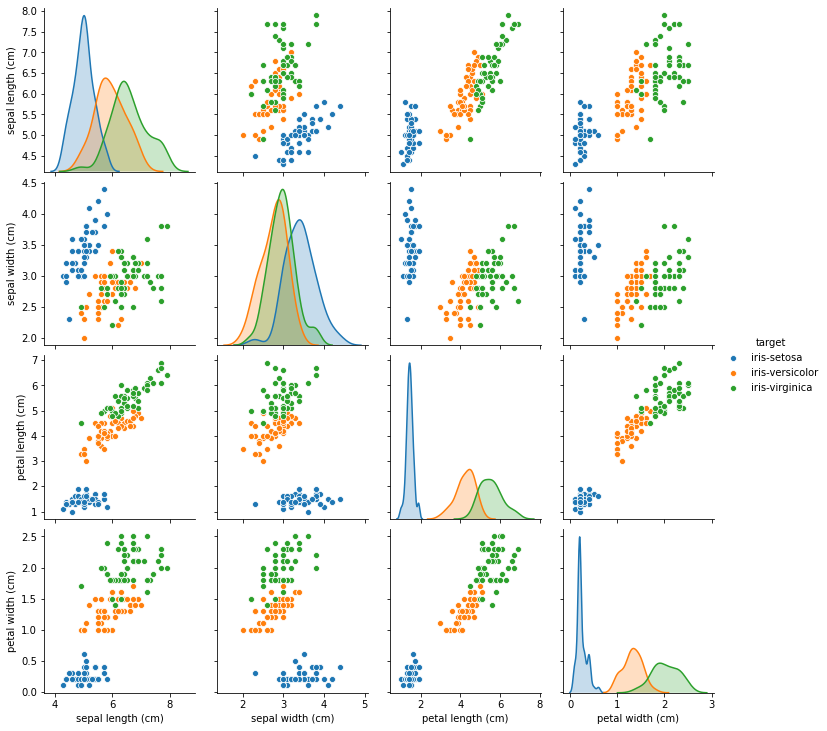

In [54]:
sns.pairplot(data=iris_df,hue='target',diag_kind='kde');   ## One way of visualizing higher dimensions data in 2-D scatter plots

In [55]:
iris_st_df = pd.concat([pd.DataFrame(ss.fit_transform(iris_df.iloc[:,0:4]),columns=iris.feature_names),iris_df['target']],axis=1)

In [56]:
iris_st_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,iris-setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,iris-setosa
2,-1.385353,0.328414,-1.397064,-1.315444,iris-setosa
3,-1.506521,0.098217,-1.283389,-1.315444,iris-setosa
4,-1.021849,1.249201,-1.340227,-1.315444,iris-setosa


##### **Before applying PCA, the first step is to standardized the dataset column-wise with mean as 0 and variance as 1.**

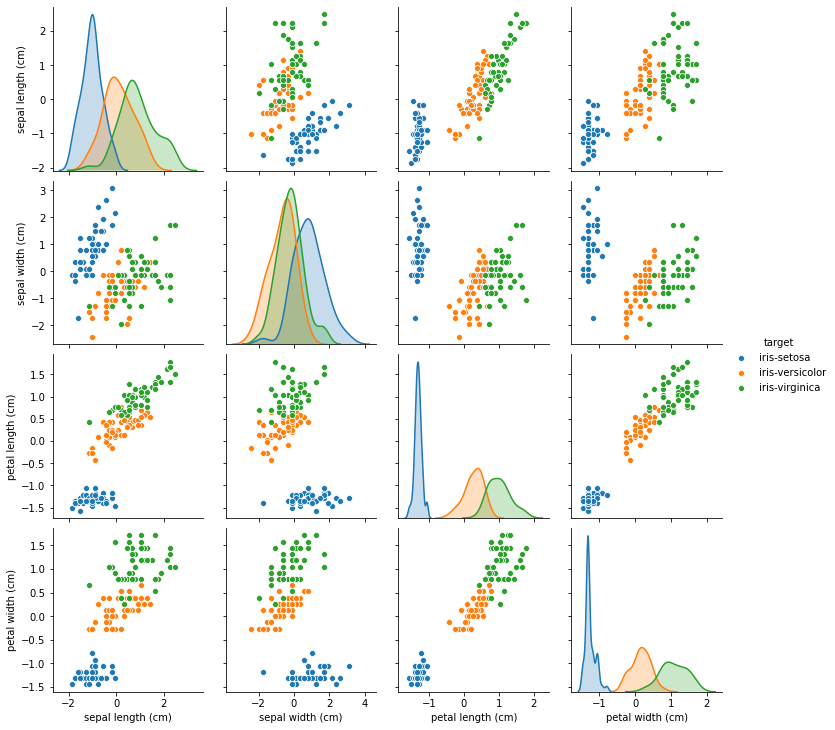

In [57]:
sns.pairplot(data=iris_st_df,hue='target');  ## Standardizing doesn't affect the representation of data points

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca2 = PCA()

In [60]:
pca_comps = pd.DataFrame(pca2.fit_transform(iris_st_df.iloc[:,0:4]),columns=['PC1','PC2','PC3','PC4'])

In [61]:
pca_comps.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


### **Variances of the components**

In [63]:
pca2.explained_variance_      ## Variances of generated components

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [64]:
## ## Manual calculation :: Unbiased variance of components
print(np.var(pca_comps['PC1'],ddof=1),
np.var(pca_comps['PC2'],ddof=1),
np.var(pca_comps['PC3'],ddof=1),
np.var(pca_comps['PC4'],ddof=1),sep='\n')

2.938085050199999
0.9201649041624874
0.14774182104494815
0.020853862176462293


### **Percentage of variations explained by components**

In [65]:
## Percentage of variation explained by every component
pca2.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [66]:
## Sum of variances in the features post normalizing
var_sum_feat = np.var(iris_st_df).sum()
var_sum_feat

3.999999999999999

In [67]:
## Manual calculation :: Percentage of variations explained by components
print(np.var(pca_comps['PC1'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC2'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC3'],ddof=0)/var_sum_feat,
np.var(pca_comps['PC4'],ddof=0)/var_sum_feat,sep='\n')

0.7296244541329998
0.2285076178670178
0.03668921889282879
0.005178709107154803


#### **Scree Plot :: Displays the percentage of variation explained by each component**

In [68]:
var_ratio = np.round(pca2.explained_variance_ratio_*100,2)

In [69]:
var_ratio

array([72.96, 22.85,  3.67,  0.52])

In [70]:
var_ratio_labels = ['PC'+str(x) for x in range(1,len(var_ratio)+1)]

In [71]:
var_ratio_labels

['PC1', 'PC2', 'PC3', 'PC4']

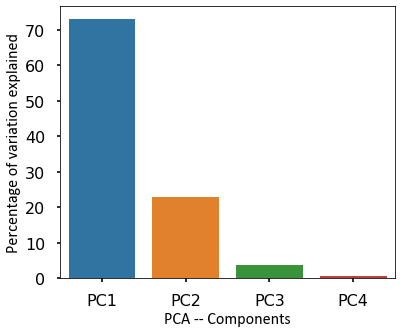

In [72]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(6,5))
    sns.barplot(x=var_ratio_labels,y=var_ratio)
    plt.xlabel('PCA -- Components',fontdict={'size':16,'family':'calibri'})
    plt.ylabel('Percentage of variation explained',fontdict={'size':16,'family':'calibri'})
    plt.show()

##### **I'll go ahead with PC1 and PC2 which covers 95% of the variation so the loss of only 5% information.**

In [73]:
iris_pca_comp = pd.DataFrame(pca2.fit_transform(iris_st_df.iloc[:,0:4]),columns=['Component1','Component2','Component3','Component4'])

In [74]:
iris_pca_comp.head()

,Component1,Component2,Component3,Component4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [75]:
iris_pca_comp.shape

(150, 4)

In [76]:
iris_pca_comp = pd.concat([iris_pca_comp,iris_st_df['target']],axis=1)

In [77]:
iris_pca_comp.head()

,Component1,Component2,Component3,Component4,target
0,-2.264703,0.480027,-0.127706,-0.024168,iris-setosa
1,-2.080961,-0.674134,-0.234609,-0.103007,iris-setosa
2,-2.364229,-0.341908,0.044201,-0.028377,iris-setosa
3,-2.299384,-0.597395,0.091290,0.065956,iris-setosa
4,-2.389842,0.646835,0.015738,0.035923,iris-setosa


#### **Visualizing the dataset using the PCA components**

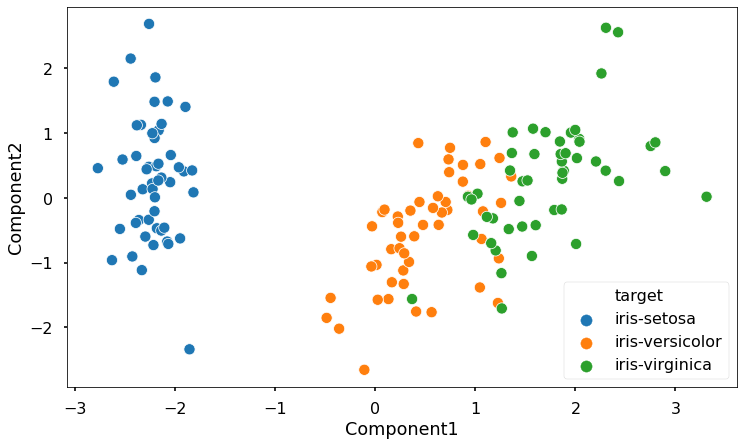

In [78]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x='Component1',y='Component2',data=iris_pca_comp,hue='target');

## **`Ways_of_generating_Symmetric_Matrix`**

In [79]:
cov_symm_matrix = pd.DataFrame(np.cov(iris_st_df.iloc[:,0:-1],rowvar=False))

In [80]:
cov_symm_matrix

,0,1,2,3
0,1.006711,-0.118359,0.877604,0.823431
1,-0.118359,1.006711,-0.431316,-0.368583
2,0.877604,-0.431316,1.006711,0.969328
3,0.823431,-0.368583,0.969328,1.006711


##### **COV calculation ways**

##### **Way-1**

In [81]:
np.cov(iris_st_df.iloc[:,0])

array(1.00671141)

##### **Way-2**

In [82]:
np.var(iris_st_df.iloc[:,0],ddof=1)

1.006711409395973

##### **Way-3**

In [83]:
np.dot((iris_st_df.iloc[:,0:-1].T),iris_st_df.iloc[:,0:-1])/150

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])